Names: Cas Hoekstra, Rohan Zonneveld and Joost Driessen. The common letter in these three names is the letter 'r'. Thus it makes sense to choose the vectors from the (p,q,r)-row. These vectors are U(45,2), V(35,39) and (15,60). 

In [83]:
import numpy as np
import random
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

def calc_distance(x,u):
    distance = np.log(3 + 3 * (x[0] - u[0])**2 + 1.5 * (x[1] - u[1])**2)
    return distance

def calc_diff(x):
    u = (45,2)
    v = (35,39)
    w = (15,60)
    diff = calc_distance(x,u) + calc_distance(x,v) + calc_distance(x,w)
    return diff

In [84]:

diff = []
for i in range(20):
    nr = (random.randint(0,100), random.randint(0,100))
    diff.append(calc_diff(nr))

max_diff = max(diff)
min_diff = min(diff)
mean_diff = np.mean(diff)
print('The highest difference is: ' + str(max_diff))
print('The lowest difference is: ' + str(min_diff))
print('The mean diffence is: ' + str(mean_diff))

The highest difference is: 26.118270812048983
The lowest difference is: 17.26209231066103
The mean diffence is: 22.976605852834144


Random search could be a decent way to minimize this function if your search space is small enough. However it will never be the superior way.

In [85]:
x0 = (50,50)
diff1 = calc_diff(x0)
diff2 = calc_diff((50,50))

if diff1 == diff2:
    print('diff1 and diff2 are the same')
else:
    print('diff1 and diff2 are not the same')

diff1 and diff2 are the same


In [86]:
def calc_grad(x):
    delta = 0.001
    diff = calc_diff(x)
    grad1 = calc_diff((x[0]+delta, x[1]))
    grad2 = calc_diff((x[0], x[1] + delta))
    grad = ((grad1-diff)/delta, (grad2-diff)/delta)
    return grad

In [87]:
x1 = (0,0)
x2 = (100,0)
x3 = (0,100)
x4 = (100,100)

x_list = [x1,x2,x3,x4]

grad_list = []
for x in x_list:
    grad_list.append(calc_grad(x))

min_grad_size = 100
idx = 0
for grad in grad_list:
    grad_size = sqrt(grad[0]**2 + grad[1]**2)
    if grad_size < min_grad_size:
        min_grad_size = grad_size
        min_idx = idx
    idx += 1

print('There could be a minimum around vector {}'.format(x_list[min_idx]))


There could be a minimum around vector (100, 100)


One vector gives two gradients, one for the x and one for the y. These gradients combined produce a new vector starting from the initial vector. The size of this vector tells us something about the steepness of the landscape at that point. If the size is large, it is steeper than when it is low. So in order to find a minimum (or maximum) you have to find a point where the vector produced by these gradients is close to zero. In the code above the size of the gradients at the four vectors is calculated and the smallest of these four has the highest probability to be around a minimum or maximum. 

In [88]:
def calc_xnext(x, grad, step_size):
    xnext = (x[0] - (grad[0] * step_size), x[1] - (grad[1] * step_size))
    return xnext

xzero = (50,50)
step_size = 10
xnext = calc_xnext(xzero, calc_grad(xzero), step_size)
print(xnext)

(48.31941959666182, 49.286945828487205)


In [89]:
def find_local_minimum(x, step_size):
    diff = []
    x = [x]
    while step_size > 0.001:
        diff.append(calc_diff(x[-1]))
        print('x = {}, diff(x) = {}'.format(x[-1],diff[-1]))
        if len(diff) > 1:
            if diff[-1] >= diff[-2]:
                step_size = step_size / 2
        x.append(calc_xnext(x[-1], calc_grad(x[-1]),step_size))

    x.pop() # Final calculated x is not used
    print(f'Local optimum at {x[-1]} with distance {diff[-1]}')
    return x, diff

# for x0 = (50,50)
x_list0,diff_list0 = find_local_minimum(xzero,step_size)


x = (50, 50), diff(x) = 23.17663423027539
x = (48.31941959666182, 49.286945828487205), diff(x) = 22.833176907515046
x = (46.53881953321388, 48.51544889047261), diff(x) = 22.442649964148202
x = (44.63007297585193, 47.66462619511742), diff(x) = 21.98546502842279
x = (42.549534060941596, 46.69624443171756), diff(x) = 21.425806540538325
x = (40.22548815901246, 45.53022318515616), diff(x) = 20.688320353255946
x = (37.53802719807737, 43.96117808370121), diff(x) = 19.57932546577746
x = (34.41974955987632, 41.25278168325082), diff(x) = 17.750782472782653
x = (36.951367928682544, 35.3324707777702), diff(x) = 18.841257387383507
x = (35.109918436201326, 36.810946877326955), diff(x) = 17.593410726699783
x = (34.62802966253449, 39.94779942348643), diff(x) = 16.85328856712544
x = (36.7594813132321, 36.903691979858166), diff(x) = 18.26274894454259
x = (35.27549285654459, 37.6856318356122), diff(x) = 17.048393037128815
x = (34.47719415314516, 39.34217735206076), diff(x) = 16.664586374009232
x = (36.33

In [90]:
# for x0 = (0,0)
x_list1,diff_list1 = find_local_minimum((0,0),1)

x = (0, 0), diff(x) = 26.118590490778683
x = (0.09442428135386649, 0.050233604422800227), diff(x) = 26.107143853650705
x = (0.18895008432195937, 0.1005667778706254), diff(x) = 26.0956679935638
x = (0.2835776216443264, 0.15099979585997403), diff(x) = 26.084162801944636
x = (0.3783071062493093, 0.20153293378299963), diff(x) = 26.072628169903325
x = (0.47313875126064886, 0.2521664668577728), diff(x) = 26.061063988236207
x = (0.5680727699513, 0.30290067012828104), diff(x) = 26.049470147431315
x = (0.6631093757789586, 0.3537358184289019), diff(x) = 26.03784653766784
x = (0.7582487823540873, 0.40467218636308644), diff(x) = 26.026193048821447
x = (0.8534912034505737, 0.4557100482855958), diff(x) = 26.014509570465385
x = (0.9488368529879665, 0.5068496782811849), diff(x) = 26.002795991874542
x = (1.0442859450101594, 0.5580913501219698), diff(x) = 25.99105220203105
x = (1.1398386937209182, 0.6094353372567696), diff(x) = 25.979278089622852
x = (1.2354953134270374, 0.6608819127826848), diff(x) = 2

In [91]:
# for x0 = (100,100)
x_list2,diff_list2 = find_local_minimum((100,100),1)


x = (100, 100), diff(x) = 29.965569228196806
x = (99.94340810792437, 99.9724747878247), diff(x) = 29.961607790795554
x = (99.88678733979697, 99.94492521936706), diff(x) = 29.957641740244775
x = (99.83013765221429, 99.91735124729786), diff(x) = 29.953671066154083
x = (99.7734590016627, 99.88975282415637), diff(x) = 29.949695758098642
x = (99.71675134452553, 99.86212990231493), diff(x) = 29.94571580561849
x = (99.66001463706178, 99.83448243402862), diff(x) = 29.941731198218584
x = (99.60324883543805, 99.80681037140329), diff(x) = 29.937741925369586
x = (99.54645389570018, 99.7791136663956), diff(x) = 29.93374797650617
x = (99.48962977378031, 99.75139227082721), diff(x) = 29.929749341027676
x = (99.43277642550754, 99.723646136367), diff(x) = 29.92574600829812
x = (99.3758938065973, 99.69587521454883), diff(x) = 29.92173796764594
x = (99.31898187264423, 99.66807945675029), diff(x) = 29.917725208362906
x = (99.26204057914703, 99.64025881421747), diff(x) = 29.913707719706085
x = (99.20506988

x = (82, 33), diff(x) = 27.015569007687915
x = (81.89021812329071, 32.991502180712644), diff(x) = 27.00343373786206
x = (81.78024035867463, 32.98296747832427), diff(x) = 26.991254719781374
x = (81.67006579004902, 32.974395618412615), diff(x) = 26.979031666786693
x = (81.55969349533191, 32.96578632390154), diff(x) = 26.966764289704834
x = (81.44912254643725, 32.95713931506103), diff(x) = 26.954452296825675
x = (81.33835200921806, 32.948454309468104), diff(x) = 26.942095393875178
x = (81.2273809434522, 32.939731021974865), diff(x) = 26.92969328399299
x = (81.11620840279625, 32.93096916470492), diff(x) = 26.917245667706542
x = (81.00483343473567, 32.92216844698589), diff(x) = 26.90475224290403
x = (80.89325508057425, 32.913328575349425), diff(x) = 26.892212704812085
x = (80.78147237537362, 32.90444925349564), diff(x) = 26.879626745967443
x = (80.66948434793201, 32.895530182275394), diff(x) = 26.86699405619288
x = (80.55729002074156, 32.886571059636964), diff(x) = 26.854314322570325
x = (8

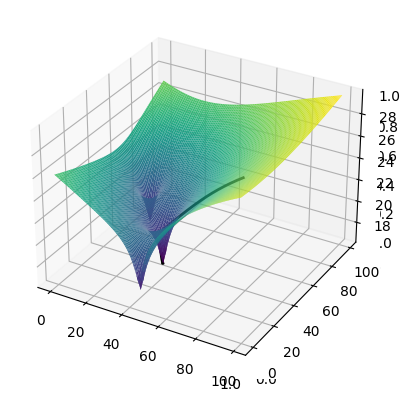

In [92]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make axes.
X = np.arange(0, 100)
Y = np.arange(0, 100)
X, Y = np.meshgrid(X, Y)
Z = calc_diff((X,Y))

# plot random guess
guess=(random.randint(0,100),random.randint(0,100))
x, diff = find_local_minimum(guess,1)

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.plot([elem[0] for elem in x], [elem[1] for elem in x], diff, 'k-', linewidth=2)
